# Importation des modules 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from math import *  
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import time
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_predict

# Imporation du dataset 

In [ ]:
#df1=pd.read_csv("/content/drive/MyDrive/dataset/datasetfinal.csv")
#df1=df1.sample(frac=1).reset_index(drop=True)
df1=pd.read_csv("/content/drive/MyDrive/code source/Copie de datasetfinal.csv")
df1=df1.sample(frac=1).reset_index(drop=True)

# Définition de l'ensemble teste et l'ensemble d'entrainement 

In [ ]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
k = 5
kf = KFold(n_splits=k, random_state=None)

# **Modèle SVM**

## SVM Hyperparameter Tuning using GridSearchCV | ML

https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/?fbclid=IwAR3rCwviDBfVuTYX4mKxdiMr1e8Krmpb4qEdTuv_gieSdoH5VblSL5kFalE

In [ ]:
x = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
svm_x_train, svm_x_test, svm_y_train, svm_y_test = train_test_split(x, y, test_size=0.90, random_state=0)

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(svm_x_train,svm_y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   2.9s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=100, gamma=1, kernel='poly')


https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

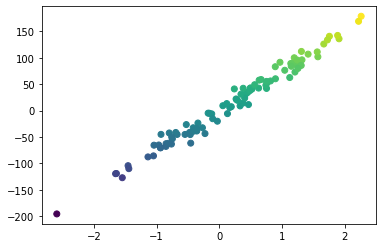

In [ ]:
x, y= make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x,y, c=y)

Text(0.5, 1.0, 'Test set')

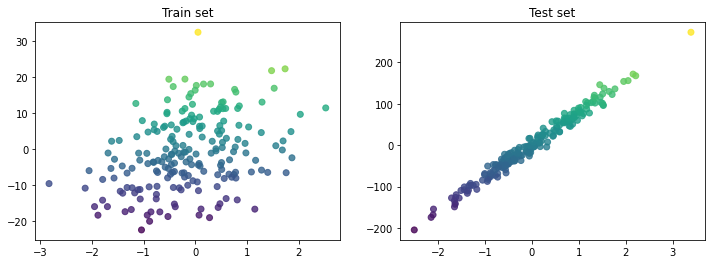

In [ ]:
#Analyse des données
plt.figure(figsize=(12, 4))
plt.subplot(121)
svm_x_train, svm_y_train= make_regression(n_samples=200, n_features=1, noise=10)
svm_x_test, svm_y_test= make_regression(n_samples=200, n_features=1, noise=10)
plt.scatter(svm_x_train, svm_y_train ,c=svm_y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(svm_x_test, svm_y_test,c=svm_y_test, alpha=0.8)
plt.title('Test set')

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:

SVM_model = SVC(C=100, gamma=1, kernel='poly')

acc_score = []
temp_test_score=[]
temp_entr_score=[]
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    start = time.time() 
    SVM_model.fit(X_train,y_train)
    end = time.time()
    temp_entr_score.append(end - start)

    start = time.time()
    pred_values1 = SVM_model.predict(X_test)
    end = time.time()
    temp_test_score.append(end - start)

    acc = accuracy_score(pred_values1 , y_test)
    acc_score.append(acc)

report = cross_val_predict(SVM_model,X_test, y_test)
print(report)
     
avg_acc_score = sum(acc_score)/k
avg_tt_score = sum(temp_entr_score)/k
avg_tes_score = sum(temp_test_score)/k

print('la moyenne du temp du test :',avg_tes_score)
print('la moyenne du temp d entrainement :',avg_tt_score)
print('la moyenne d accuracy : {}'.format(avg_acc_score))

['email' 'email' 'chat' ... 'email' 'facebook' 'facebook']
la moyenne du temp du test : 2.693510913848877
la moyenne du temp d entrainement : 28.733583402633666
la moyenne d accuracy : 0.9726415094339622


In [ ]:
print(classification_report(y_test, report))

              precision    recall  f1-score   support

      WebRTC       0.99      0.98      0.98      1654
        chat       0.92      0.96      0.94      1337
       email       0.98      0.95      0.97      2376
    facebook       0.94      0.99      0.96      2167
       skype       0.99      0.95      0.97      1750
     youtube       0.99      0.98      0.98      1740

    accuracy                           0.97     11024
   macro avg       0.97      0.97      0.97     11024
weighted avg       0.97      0.97      0.97     11024



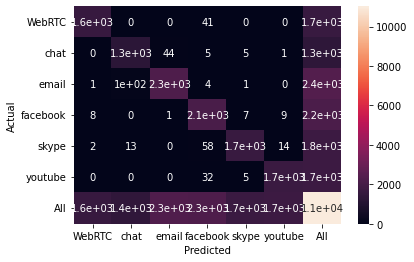

In [ ]:
data = {'y_Actual':    y_test, 'y_Predicted': report }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

# **Modèle Random forest**

https://www.kaggle.com/code/funxexcel/p2-random-forest-tuning-gridsearchcv/notebook?fbclid=IwAR1N-FZXCb6staJ0AcVSMxIHP-t7Bvqwg3kZ6_IGSfc85OY9lNrfBmKZvVM

In [ ]:
# classifieur Random Forest
RF=RandomForestClassifier()
# Nombre d’arbres dans la forêt aléatoire 
n_estimators = [10,30,50,80,100]
# # Nombre de caracteristique à considérer à chaque split
max_features = ['auto', 'sqrt']
# Nombre minimal d’échantillons requis pour fractionner un nœud
min_samples_split = [2, 5]
# Nombre minimal d’échantillons requis à chaque nœud foliaire
min_samples_leaf = [1, 2]
# Méthode de sélection des échantillons pour la formation de chaque arbre
bootstrap = [True, False]
# Créer param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 30, 50, 80, 100], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 30, 50, 80, 100]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [ ]:
RF_model = RandomForestClassifier( n_estimators= 50,min_samples_split=5,min_samples_leaf=1,max_features='sqrt',bootstrap=False)

acc_score = []
temp_test_score=[]
temp_entr_score=[]
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    start = time.time() 
    RF_model.fit(X_train,y_train)
    end = time.time()
    temp_entr_score.append(end - start)

    start = time.time()
    pred_values2 = RF_model.predict(X_test)
    end = time.time()
    temp_test_score.append(end - start)

    acc = accuracy_score(pred_values2 , y_test)
    acc_score.append(acc)

report = cross_val_predict(RF_model,X_test, y_test)
print(report)
     
avg_acc_score = sum(acc_score)/k
avg_tt_score = sum(temp_entr_score)/k
avg_tes_score = sum(temp_test_score)/k

print('la moyenne du temp du test :',avg_tes_score)
print('la moyenne du temp d entrainement :',avg_tt_score)
print('la moyenne d accuracy : {}'.format(avg_acc_score))

['email' 'email' 'chat' ... 'email' 'facebook' 'facebook']
la moyenne du temp du test : 0.0860668659210205
la moyenne du temp d entrainement : 4.371924924850464
la moyenne d accuracy : 0.999365021770682


In [ ]:
print(classification_report(y_test, report))

              precision    recall  f1-score   support

      WebRTC       1.00      1.00      1.00      1654
        chat       0.98      1.00      0.99      1337
       email       1.00      0.99      1.00      2376
    facebook       1.00      1.00      1.00      2167
       skype       1.00      0.99      1.00      1750
     youtube       1.00      1.00      1.00      1740

    accuracy                           1.00     11024
   macro avg       1.00      1.00      1.00     11024
weighted avg       1.00      1.00      1.00     11024



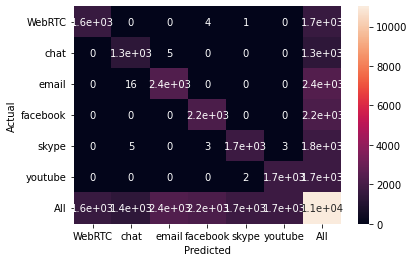

In [ ]:
data = {'y_Actual':    y_test, 'y_Predicted': report }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
df1.drop(['type'], axis = 1, inplace = True) 
feature_list =  df1.columns.to_list()
print(feature_list)
# Pull out one tree from the forest
tree = RF_model.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = RF_model.estimators_[5]
# Export the image to a dot file

export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'source port', 'destination port', 'Pocket_duration', 'Packet_per_seconde', 'Packet_ducration_p_seconde']


In [ ]:
df1.drop(['type'], axis = 1, inplace = True) 

In [ ]:
rf_feature_list=list(df1.columns)
rf_feature_importance=pd.Series(RF_model.feature_importances_,index=rf_feature_list).sort_values(ascending=False)
print(rf_feature_importance)
#-----------------------------------------------
rf_importances = RF_model.feature_importances_
# Sort the feature importance in descending order
sorted_indices = np.argsort(rf_importances)[::-1]

Packet_per_seconde            0.223009
Time                          0.219493
Protocol                      0.156025
source port                   0.123817
destination port              0.109723
No.                           0.091385
Length                        0.062073
Packet_ducration_p_seconde    0.010749
Pocket_duration               0.003652
Destination                   0.000037
Source                        0.000036
dtype: float64


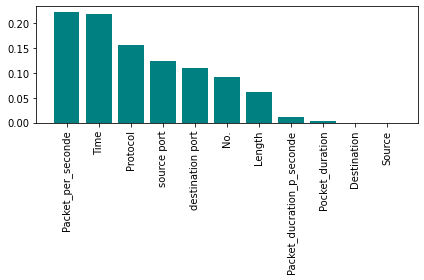

In [ ]:
import matplotlib.pyplot as plt
plt.bar(range(X_train.shape[1]),rf_importances[sorted_indices], color="teal",align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# **modèle naive bayésien**

In [ ]:
NB = GaussianNB(priors=None)
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=50)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.004094915062380423)


In [ ]:
NB_model = GaussianNB(var_smoothing=1.5998587196060574e-07)

acc_score = []
temp_test_score=[]
temp_entr_score=[]
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    start = time.time() 
    NB_model.fit(X_train,y_train)
    end = time.time()
    temp_entr_score.append(end - start)

    start = time.time()
    pred_values3 = NB_model.predict(X_test)
    end = time.time()
    temp_test_score.append(end - start)

    acc = accuracy_score(pred_values3 , y_test)
    acc_score.append(acc)

report = cross_val_predict(NB_model,X_test, y_test)
print(report)
     
avg_acc_score = sum(acc_score)/k
avg_tt_score = sum(temp_entr_score)/k
avg_tes_score = sum(temp_test_score)/k

print('la moyenne du temp du test :',avg_tes_score)
print('la moyenne du temp d entrainement :',avg_tt_score)
print('la moyenne d accuracy : {}'.format(avg_acc_score))

['email' 'email' 'chat' ... 'email' 'WebRTC' 'facebook']
la moyenne du temp du test : 0.009167003631591796
la moyenne du temp d entrainement : 0.1338651180267334
la moyenne d accuracy : 0.7236574746008708


In [ ]:
print(classification_report(y_test, report))

              precision    recall  f1-score   support

      WebRTC       0.68      0.97      0.80      1654
        chat       0.60      0.98      0.74      1337
       email       1.00      0.78      0.88      2376
    facebook       0.63      0.63      0.63      2167
       skype       0.54      0.19      0.28      1750
     youtube       0.92      0.97      0.94      1740

    accuracy                           0.74     11024
   macro avg       0.73      0.75      0.71     11024
weighted avg       0.74      0.74      0.72     11024



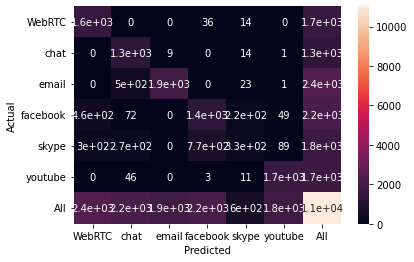

In [ ]:
data = {'y_Actual':    y_test, 'y_Predicted': report }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

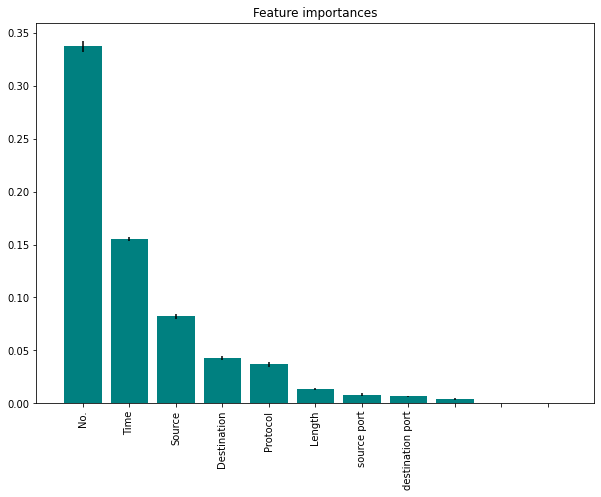

In [ ]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(NB_model, X_test, y_test)
nb_importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(nb_importances)[::-1]
plt.figure(figsize=(10, 7))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), nb_importances[indices], color="teal", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), [X_train.columns[i] for i in range(8)], rotation=90)
plt.xlim([-1, X_test.shape[1]])
plt.show()

# **Modèle KNN**

https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 25))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=8, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 8 folds for each of 24 candidates, totalling 192 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 1}


https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=1)


acc_score = []
temp_test_score=[]
temp_entr_score=[]
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    start = time.time() 
    KNN_model.fit(X_train,y_train)
    end = time.time()
    temp_entr_score.append(end - start)

    start = time.time()
    pred_values4 = KNN_model.predict(X_test)
    end = time.time()
    temp_test_score.append(end - start)

    acc = accuracy_score(pred_values4 , y_test)
    acc_score.append(acc)

report = cross_val_predict(KNN_model,X_test, y_test)
print(report)
     
avg_acc_score = sum(acc_score)/k
avg_tt_score = sum(temp_entr_score)/k
avg_tes_score = sum(temp_test_score)/k

print('la moyenne du temp du test :',avg_tes_score)
print('la moyenne du temp d entrainement :',avg_tt_score)
print('la moyenne d accuracy : {}'.format(avg_acc_score))

['email' 'email' 'chat' ... 'email' 'facebook' 'facebook']
la moyenne du temp du test : 1.4001379013061523
la moyenne du temp d entrainement : 0.2349118709564209
la moyenne d accuracy : 0.9969702467343977


In [ ]:
print(classification_report(y_test, report))

              precision    recall  f1-score   support

      WebRTC       1.00      1.00      1.00      1654
        chat       0.95      0.97      0.96      1337
       email       0.99      0.98      0.98      2376
    facebook       0.98      0.99      0.99      2167
       skype       0.99      0.98      0.99      1750
     youtube       1.00      1.00      1.00      1740

    accuracy                           0.99     11024
   macro avg       0.99      0.99      0.99     11024
weighted avg       0.99      0.99      0.99     11024



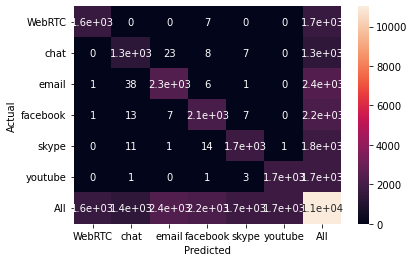

In [66]:
data = {'y_Actual':    y_test, 'y_Predicted': report}
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modèle SGDClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [ ]:
SGDC = SGDClassifier()

In [ ]:
param_grid = {
    "average": [True, False],
    "l1_ratio": np.linspace(0, 1, num=10),
    "alpha": np.power(10, np.arange(-2, 1, dtype=float)),
}
grid_search = GridSearchCV(SGDC, param_grid=param_grid)

grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
print(grid_search.cv_results_)

SGDClassifier(alpha=0.01, average=True, l1_ratio=0.8888888888888888)
{'mean_fit_time': array([0.20586934, 0.21667762, 0.20943279, 0.21016493, 0.21093965,
       0.20469532, 0.20618014, 0.21191511, 0.20858006, 0.20939522,
       0.18126311, 0.18082981, 0.19016376, 0.18407865, 0.18219814,
       0.17980633, 0.18254313, 0.1858161 , 0.19011402, 0.18268509,
       0.19686146, 0.19871073, 0.19560237, 0.20405865, 0.19826493,
       0.2005734 , 0.20995564, 0.23076839, 0.21975665, 0.21667781,
       0.18547335, 0.19369249, 0.18989973, 0.18235264, 0.18115177,
       0.18116946, 0.17365937, 0.18347197, 0.18976555, 0.17500849,
       0.19541745, 0.20064516, 0.19945321, 0.20686498, 0.19518833,
       0.19919453, 0.19721031, 0.21059179, 0.19760399, 0.19682422,
       0.17140794, 0.16868334, 0.17335443, 0.17024417, 0.16999898,
       0.16773739, 0.16783419, 0.17609973, 0.17230129, 0.17447495]), 'std_fit_time': array([0.01478352, 0.00708545, 0.00632274, 0.00461664, 0.00104786,
       0.00338264, 0.006

In [ ]:
print(grid_search.best_estimator_)

SGDClassifier(alpha=0.01, average=True, l1_ratio=0.8888888888888888)


In [67]:
SGDC_model = SGDClassifier(alpha=0.01, l1_ratio=0.6666666666666666)



acc_score = []
temp_test_score=[]
temp_entr_score=[]
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    start = time.time() 
    SGDC_model.fit(X_train,y_train)
    end = time.time()
    temp_entr_score.append(end - start)

    start = time.time()
    pred_values5 = SGDC_model.predict(X_test)
    end = time.time()
    temp_test_score.append(end - start)

    acc = accuracy_score(pred_values5 , y_test)
    acc_score.append(acc)

report = cross_val_predict(SGDC_model,X_test, y_test)
print(report)
     
avg_acc_score = sum(acc_score)/k
avg_tt_score = sum(temp_entr_score)/k
avg_tes_score = sum(temp_test_score)/k

print('la moyenne du temp du test :',avg_tes_score)
print('la moyenne du temp d entrainement :',avg_tt_score)
print('la moyenne d accuracy : {}'.format(avg_acc_score))

['email' 'email' 'youtube' ... 'email' 'WebRTC' 'facebook']
la moyenne du temp du test : 0.008028411865234375
la moyenne du temp d entrainement : 0.6137757301330566
la moyenne d accuracy : 0.6656930333817126


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, report))

              precision    recall  f1-score   support

      WebRTC       0.55      0.98      0.70      1654
        chat       0.38      0.30      0.34      1337
       email       0.82      0.83      0.83      2376
    facebook       0.89      0.21      0.34      2167
       skype       0.79      0.78      0.79      1750
     youtube       0.71      0.96      0.82      1740

    accuracy                           0.68     11024
   macro avg       0.69      0.68      0.63     11024
weighted avg       0.72      0.68      0.65     11024



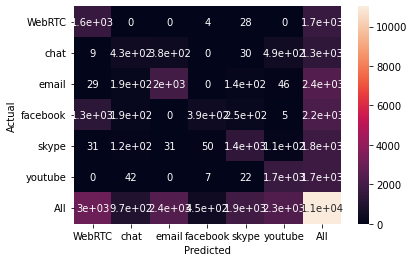

In [68]:
import seaborn as sns 
data = {'y_Actual':    y_test, 'y_Predicted': report }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

# **Comparaison entre les algorithmes du machine learning**

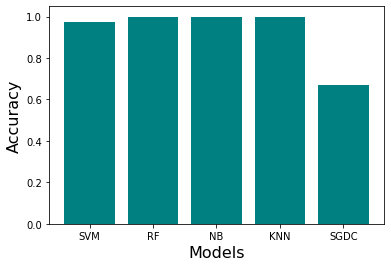

In [69]:
names = ['SVM','RF',  'NB','KNN','SGDC'] 
values = []
values.append(metrics.accuracy_score(y_test, pred_values1))
values.append(metrics.accuracy_score(y_test, pred_values2))
values.append(metrics.accuracy_score(y_test, pred_values3))
values.append(metrics.accuracy_score(y_test, pred_values4))
values.append(metrics.accuracy_score(y_test, pred_values5))
plt.xlabel('Models',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.bar(names, values , color = 'teal') 
plt.show() 

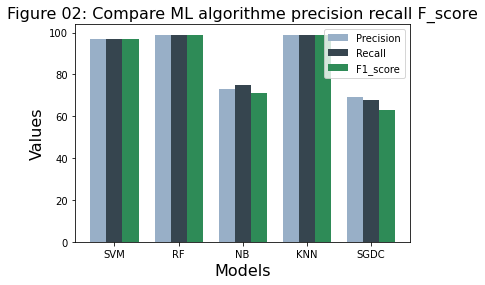

In [2]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 5
ind = np.arange(N) 
width = 0.25
  
xvals = [97, 99 , 73, 99, 69 ]
bar1 = plt.bar(ind, xvals, width, color = '#98AFC7')
  
yvals = [97, 99, 75, 99,68]
bar2 = plt.bar(ind+width, yvals, width, color='#36454F')
  
zvals = [97, 99, 71, 99,63]
bar3 = plt.bar(ind+width*2, zvals, width, color = '#2E8B57')

  
plt.xlabel("Models",fontsize=16)
plt.ylabel('Values',fontsize=16)
plt.title("Figure 02: Compare ML algorithme precision recall F_score",fontsize=16)
  
plt.xticks(ind+width,['SVM', 'RF', 'NB','KNN','SGDC'])
plt.legend( (bar1, bar2, bar3), ('Precision', 'Recall', 'F1_score') )
plt.show()
